# Aggregate Analysis
## Bike stats dataset
- Adam Grandquist
- 4/1/2018

In [1]:
import pandas as pd
import numpy as np
from datetime import date, time
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# load data from csvs

In [2]:
station_dt = pd.read_csv('./cycle-share-dataset/station.csv')
trip_dt = pd.read_csv('./cycle-share-dataset/trip.csv', error_bad_lines=False).drop_duplicates()
weather_dt = pd.read_csv('./cycle-share-dataset/weather.csv')

b'Skipping line 50794: expected 12 fields, saw 20\n'


# What is the average trip duration for a borrowed bicycle?

In [3]:
seconds = trip_dt['tripduration'].sum() / trip_dt['tripduration'].count()
time(int(seconds) // 60 // 60, int(seconds) // 60 % 60, int(seconds) % 60)

datetime.time(0, 20, 2)

# What's the most common age of a bicycle-sharer?

In [4]:
trip_dt.starttime = pd.to_datetime(trip_dt.starttime)
starttime = trip_dt.starttime

In [5]:
ages = starttime.dt.year - trip_dt['birthyear']

In [6]:
ages.mode()

0    28.0
dtype: float64

# Given all the weather data here, find the average precipitation per month, and the median precipitation.

In [7]:
weather_dt['MONTH'] = pd.to_datetime(weather_dt['Date'], errors='coerce').dt.month

In [8]:
precipitation = weather_dt[['MONTH', 'Precipitation_In']]
(precipitation.groupby('MONTH').sum() / precipitation.groupby('MONTH').count()).Precipitation_In

MONTH
1     0.143548
2     0.168421
3     0.156935
4     0.051333
5     0.012419
6     0.030500
7     0.012097
8     0.018226
9     0.041000
10    0.189000
11    0.187833
12    0.236290
Name: Precipitation_In, dtype: float64

In [9]:
weather_dt.groupby('MONTH').median()['Precipitation_In']

MONTH
1     0.020
2     0.040
3     0.025
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.000
10    0.040
11    0.035
12    0.100
Name: Precipitation_In, dtype: float64

# What’s the average number of bikes at a given bike station?

In [10]:
np.average(station_dt.current_dockcount)

16.517241379310345

# When a bike station is modified, is it more likely that it’ll lose bikes or gain bikes? How do you know?

In [11]:
station_dt.modification_date = pd.to_datetime(station_dt.modification_date)
mod_data = station_dt[['station_id', 'modification_date']]

In [12]:
bikes_to_station = pd.merge(mod_data, trip_dt, left_on='station_id', right_on='to_station_id')
bikes_from_station = pd.merge(mod_data, trip_dt, left_on='station_id', right_on='from_station_id')

In [13]:
bikes_to_station[bikes_to_station.starttime > bikes_to_station.modification_date].modification_date.count()

44060

In [14]:
bikes_from_station[bikes_from_station.starttime > bikes_from_station.modification_date].modification_date.count()

46720

- more bikes take a trip from the station after modification

# Come up with 3 more questions that can be answered with this data set.

## What is the relationship between precipitation and bike trip length

In [15]:
trip_dt['MONTH'] = pd.to_datetime(trip_dt.starttime).dt.month
pd.DataFrame(list(zip(trip_dt.groupby('MONTH').sum().tripduration, precipitation.groupby('MONTH').sum().Precipitation_In)), columns=['tripduration', 'Precipitation_In'])

,tripduration,Precipitation_In
0,1.098668e+07,8.90
1,1.378380e+07,9.60
2,1.939398e+07,9.73
3,2.821970e+07,3.08
4,3.399205e+07,0.77
5,3.649351e+07,1.83
6,4.547536e+07,0.75
7,4.001160e+07,1.13
8,1.566312e+07,1.23
9,1.698497e+07,9.45


## What is the distribution of bike trips per station?

In [16]:
trip_dt.groupby('from_station_id').count().from_station_name.plot(kind='hist')

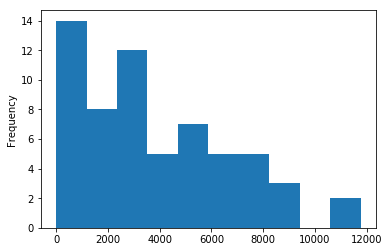

In [17]:
trip_dt.groupby('to_station_id').count().from_station_name.plot(kind='hist')

## How are trip lengths changing by hour of day?

In [18]:
trip_dt['HOUR'] = trip_dt.starttime.dt.hour

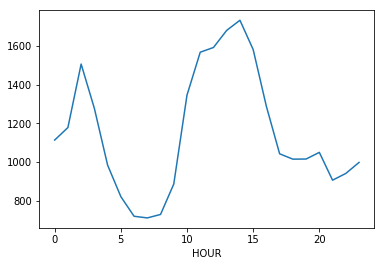

In [19]:
trip_dt.groupby('HOUR').mean().tripduration.plot()